In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
data = pd.read_csv('../data/other-Lyft_B02510.csv')

In [18]:
data

,time_of_trip,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN
1,8/27/2014 21:13,40.74916,-73.98373,NaN
2,9/4/2014 14:16,40.64065,-73.97594,NaN
3,9/4/2014 16:08,40.75002,-73.99514,NaN
4,8/28/2014 2:41,40.76715,-73.98636,NaN
...,...,...,...,...
267696,9/7/2014 3:19,40.71931,-73.99138,NaN
267697,9/7/2014 2:59,40.73868,-73.98862,NaN
267698,9/7/2014 1:55,40.71554,-73.94877,NaN
267699,9/5/2014 23:26,40.74667,-73.97445,NaN


In [19]:
data = data.drop('Unnamed: 3', axis = 1)

In [20]:
data

,time_of_trip,start_lat,start_lng
0,9/4/2014 9:51,40.64705,-73.77988
1,8/27/2014 21:13,40.74916,-73.98373
2,9/4/2014 14:16,40.64065,-73.97594
3,9/4/2014 16:08,40.75002,-73.99514
4,8/28/2014 2:41,40.76715,-73.98636
...,...,...,...
267696,9/7/2014 3:19,40.71931,-73.99138
267697,9/7/2014 2:59,40.73868,-73.98862
267698,9/7/2014 1:55,40.71554,-73.94877
267699,9/5/2014 23:26,40.74667,-73.97445


In [21]:
data['time_of_trip'] = pd.to_datetime(data['time_of_trip'], format='%m/%d/%Y %H:%M')

data['day'] = data['time_of_trip'].dt.day_name()
data['month'] = data['time_of_trip'].dt.month_name()
data['hour'] = data['time_of_trip'].dt.hour

In [22]:
data

,time_of_trip,start_lat,start_lng,day,month,hour
0,2014-09-04 09:51:00,40.64705,-73.77988,Thursday,September,9
1,2014-08-27 21:13:00,40.74916,-73.98373,Wednesday,August,21
2,2014-09-04 14:16:00,40.64065,-73.97594,Thursday,September,14
3,2014-09-04 16:08:00,40.75002,-73.99514,Thursday,September,16
4,2014-08-28 02:41:00,40.76715,-73.98636,Thursday,August,2
...,...,...,...,...,...,...
267696,2014-09-07 03:19:00,40.71931,-73.99138,Sunday,September,3
267697,2014-09-07 02:59:00,40.73868,-73.98862,Sunday,September,2
267698,2014-09-07 01:55:00,40.71554,-73.94877,Sunday,September,1
267699,2014-09-05 23:26:00,40.74667,-73.97445,Friday,September,23


In [23]:
data['month'].unique()

array(['September', 'August', 'July'], dtype=object)

In [24]:
data['day'].unique()

array(['Thursday', 'Wednesday', 'Saturday', 'Friday', 'Monday', 'Sunday',
       'Tuesday'], dtype=object)

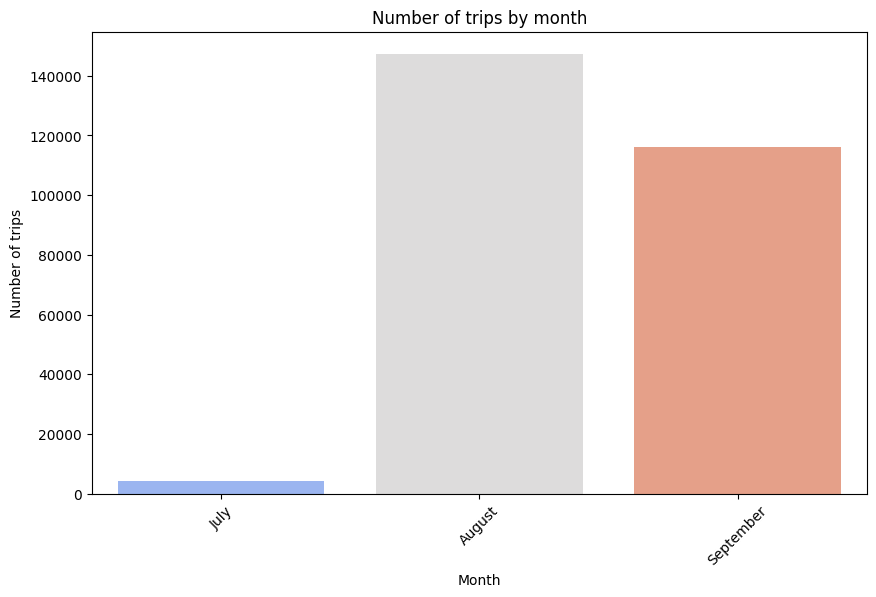

In [25]:
monthly_data = data.groupby('month').size()

monthly_data = monthly_data.reindex(["July", "August", "September"])

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_data.index, y=monthly_data.values, palette="coolwarm", hue=monthly_data.index, legend=False)
plt.title('Number of trips by month')
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)
plt.show()


The smallest amount of data is present for July, and the largest for August. However, one should not draw conclusions that there were drastically fewer rides in July, since probably not enough data was collected for that month.

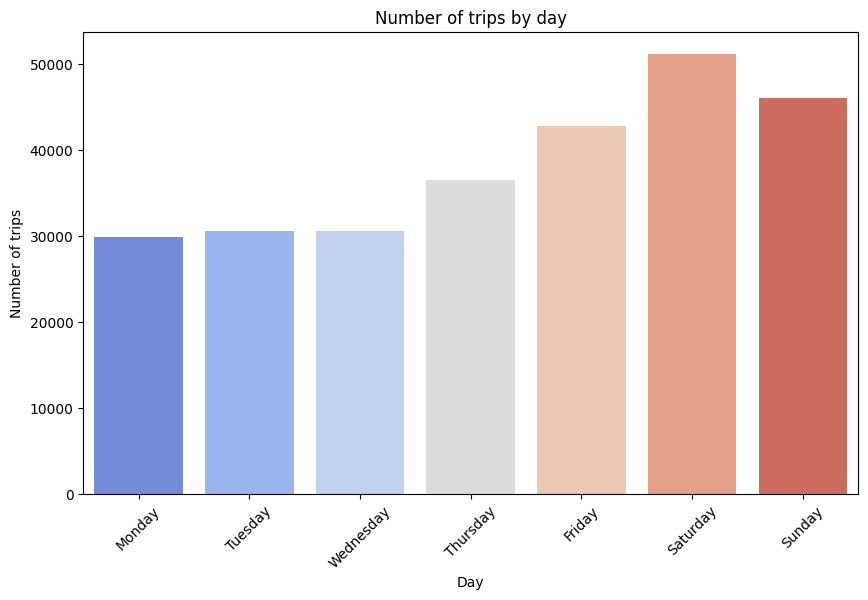

In [26]:
daily_data = data.groupby('day').size()

daily_data = daily_data.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_data.index, y=daily_data.values, palette="coolwarm", hue=daily_data.index, legend=False)
plt.title('Number of trips by day')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)
plt.show()

The chart indicates a significant increase in Lyft pickups during the weekend, with Saturday and Sunday showing the highest numbers. This suggests that people are more likely to use ride-sharing services during the weekend, possibly due to social events, leisure activities, or nightlife, where public transportation options may be less convenient or available.

From Monday to Wednesday, the number of trips remains relatively consistent, with a gradual increase starting from Thursday. Friday shows a notable increase in pickups compared to the earlier weekdays. This might be indicative of a transition period where people begin to engage in weekend activities or travel to different locations after the workweek ends.

For Lyft, understanding these patterns is crucial for resource allocation. It may be beneficial to deploy more drivers and resources during weekends and Thursday/Friday evenings to meet the increased demand. Conversely, maintaining an optimal yet efficient service during lower demand periods like Monday to Wednesday could help manage costs.

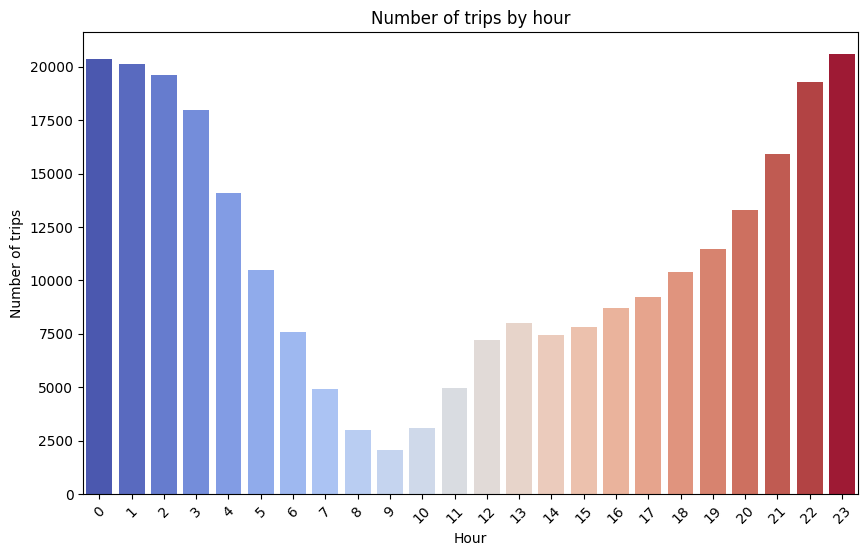

In [27]:
hourly_data = data.groupby('hour').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_data.index, y=hourly_data.values, palette="coolwarm", hue=hourly_data.index, legend=False)
plt.title('Number of trips by hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)
plt.show()

The data shows a significant number of trips during the late-night hours, particularly around midnight (00:00) and continuing into the early morning hours (01:00 - 03:00). This peak can be attributed to late-night activities such as people returning home from social events, nightlife, or after-hours work shifts. This suggests a strong demand for Lyft services during these times, likely due to the limited availability of public transportation.
There is a notable rise in Lyft pickups starting from 18:00, reaching a peak at 23:00. This evening increase is likely driven by a combination of factors: people heading home from work, going out for dinner, attending evening events, etc. The highest numbers are observed around 23:00, possibly reflecting the time when people are wrapping up their evening activities and heading home.

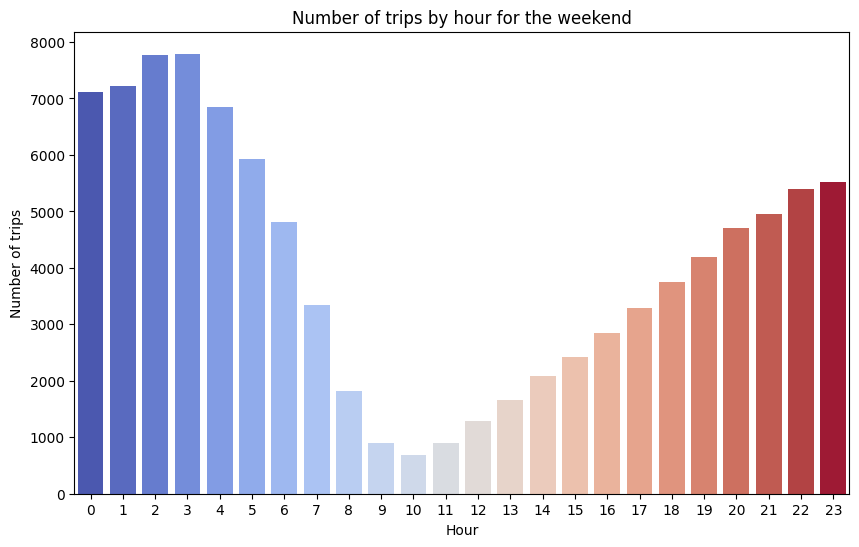

In [28]:
weekend_data = data[data['day'].isin(['Saturday', 'Sunday'])]

hourly_pickups = weekend_data.groupby('hour').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="coolwarm", hue=hourly_pickups.index, legend=False)
plt.title('Number of trips by hour for the weekend')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.xticks(rotation=0)
plt.show()

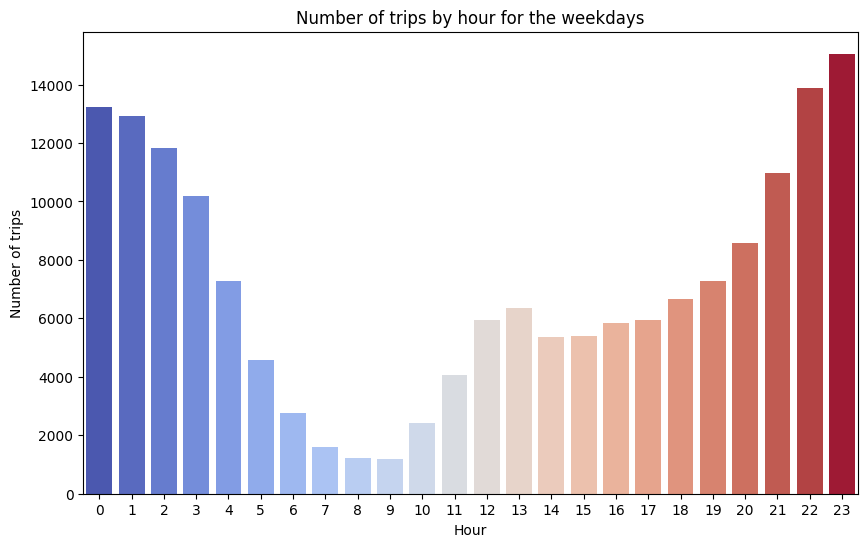

In [29]:
weekend_data = data[data['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

hourly_pickups = weekend_data.groupby('hour').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="coolwarm", hue=hourly_pickups.index, legend=False)
plt.title('Number of trips by hour for the weekdays')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.xticks(rotation=0)
plt.show()

Let's look at how ride numbers change by hour during weekends compared to weekdays. The overall pattern is similar, but on weekends, there are more rides from midnight to early morning, while on weekdays, most rides happen in the late evening, which is expected.

In [30]:
Longitudes = data['start_lng'].values
Latitudes  = data['start_lat'].values